<a href="https://colab.research.google.com/github/pranavkantgaur/Coursera_DL_specialization_from_scratch/blob/master/course1/week3/Planar_data_classification_with_onehidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the flower dataset
The utility generates the flower dataset:  
X: 2D coordibates of a point  
Y: label representing the class of that point in the flower. (Red/Blue)   
The goal of the 2-class classifier will be to assign labels to input points.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklearn_linearmodel

In [0]:
# generates synthetic dataset
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [0]:
X, Y  = load_planar_dataset()

In [12]:
print("X.shape: ", X.shape)
print("Y.shape: ", Y.shape)

X.shape:  (2, 400)
Y.shape:  (1, 400)


## Visualize the data

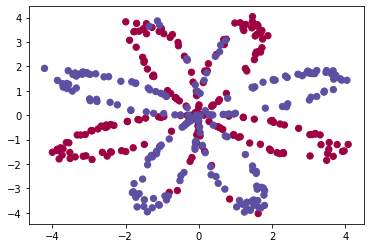

In [18]:
plt.scatter(X[0, :], X[1, :], c = Y[0, :], s = 40, cmap = plt.cm.Spectral)

## Logistic regression using sklearn

In [26]:
sklearn_classifier = sklearn_linearmodel.LogisticRegression()
sklearn_classifier.fit(X.T, np.squeeze(Y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
m = X.shape[1]
Y_pred = sklearn_classifier.predict(X.T).reshape(m ,1)
print("Average prediction error on training data: ", np.mean(np.abs(np.squeeze(Y) - Y_pred)))  
print("In terms of cross entropy: ", 100 * (np.dot(Y, Y_pred) + np.dot(1-Y, 1 - Y_pred)) / m )
# plot the decision boundary for this classifier


Average prediction error on training data:  69.08
In terms of cross entropy:  [[0.28]]
